In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [35]:
# Function to print a header with a title
def print_header(title):
    print("=" * 50)
    print(title)
    print("=" * 50)

In [36]:
# Function to get user input with a formatted prompt
def get_user_input(label):
    return input(f"{label}: ")

In [37]:
# Function to format and print prediction result in red or green color
def print_prediction(result):
    if "healthy" in result:
        print("\033[92m" + result + "\033[0m")  # Print in green color
    else:
        print("\033[91m" + result + "\033[0m")  # Print in red color

In [45]:
# Step 1: Load and Explore the Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
print_header("Step 1: Load and Explore the Dataset")
df = pd.read_csv('//content/drive/MyDrive/RAJA@24/Heart_disease_cleveland_new.csv')
# Step 2: Reshape the DataFrame for multiple columns
# Example: Reshape multiple columns into a 2D DataFrame
column_names = ['chol', 'fbs', 'restecg','thalach','exang','oldpeak','slope','ca','thal']  # Specify the names of the columns to reshape
reshaped_df = df[column_names].values.reshape(-1, len(column_names))

# Step 3: Split the data into features and target
X = reshaped_df  # Features
y = df['target']  # Target variable
print(df.head())  # Display the first few rows
print(df.info())  # Display dataset information
df.head()

Step 1: Load and Explore the Dataset
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [46]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Change data type of columns from int64 to int32
int64_columns = df.select_dtypes(include='int64').columns
df[int64_columns] = df[int64_columns].astype('int32')

# Change data type of columns from float64 to int32
float64_columns = df.select_dtypes(include='float64').columns
df[float64_columns] = df[float64_columns].astype('int32')

In [47]:
print(df.info())  # Display dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int32
 1   sex       303 non-null    int32
 2   cp        303 non-null    int32
 3   trestbps  303 non-null    int32
 4   chol      303 non-null    int32
 5   fbs       303 non-null    int32
 6   restecg   303 non-null    int32
 7   thalach   303 non-null    int32
 8   exang     303 non-null    int32
 9   oldpeak   303 non-null    int32
 10  slope     303 non-null    int32
 11  ca        303 non-null    int32
 12  thal      303 non-null    int32
 13  target    303 non-null    int32
dtypes: int32(14)
memory usage: 16.7 KB
None


In [48]:
# Step 2: Preprocess the Data
print_header("Step 2: Preprocess the Data")
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

Step 2: Preprocess the Data


In [49]:
# Step 3: Train and Evaluate Different Models
print_header("Step 3: Train and Evaluate Different Models")
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

Step 3: Train and Evaluate Different Models


In [50]:
accuracies = []
model_names = []

for name, model in models.items():
    print_header(f"Training and Evaluating {name}")
    model_names.append(name)
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy:.2f}")

Training and Evaluating Random Forest
Accuracy: 0.85
Training and Evaluating Gradient Boosting
Accuracy: 0.85
Training and Evaluating Support Vector Machine
Accuracy: 0.66
Training and Evaluating K-Nearest Neighbors
Accuracy: 0.68
Training and Evaluating Logistic Regression
Accuracy: 0.86
Training and Evaluating Decision Tree
Accuracy: 0.76


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Step 4: Create Bar Graph of Model Accuracies


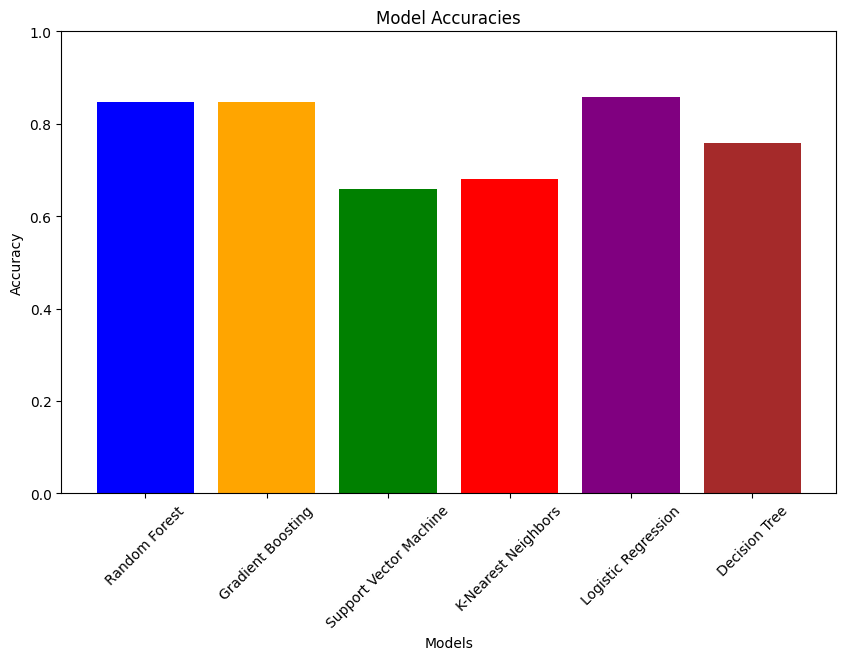

In [51]:
# Step 4: Create Bar Graph of Model Accuracies
print_header("Step 4: Create Bar Graph of Model Accuracies")
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

In [52]:
# Step 5: Accept User Input and Make Predictions
print_header("Step 5: Accept User Input and Make Predictions")
user_input = {}
user_input['age'] = int(get_user_input("Enter age"))
user_input['sex'] = int(get_user_input("Enter sex (0 for female, 1 for male)"))
user_input['cp'] = int(get_user_input("Enter chest pain type (0, 1, 2, or 3)"))
user_input['trestbps'] = int(get_user_input("Enter resting blood pressure"))
user_input['chol'] = int(get_user_input("Enter serum cholesterol"))
user_input['fbs'] = int(get_user_input("Enter fasting blood sugar (0 or 1)"))
user_input['restecg'] = int(get_user_input("Enter resting electrocardiographic results (0, 1, or 2)"))
user_input['thalach'] = int(get_user_input("Enter maximum heart rate achieved"))
user_input['exang'] = int(get_user_input("Enter exercise induced angina (0 or 1)"))
user_input['oldpeak'] = float(get_user_input("Enter ST depression induced by exercise relative to rest"))
user_input['slope'] = int(get_user_input("Enter slope of the peak exercise ST segment (0, 1, or 2)"))
user_input['ca'] = int(get_user_input("Enter number of major vessels colored by fluoroscopy (0-3)"))
user_input['thal'] = int(get_user_input("Enter thalium stress result (1, 2, or 3)"))

print_header("Predicting Heart Disease")
best_model = models["Random Forest"]  # Choose the best model based on evaluation
prediction = best_model.predict([list(user_input.values())])
result = "The person is predicted to have heart disease." if prediction[0] == 1 else "The person is predicted to be healthy."
print_prediction(result)

Step 5: Accept User Input and Make Predictions
Enter age: 20
Enter sex (0 for female, 1 for male): 1
Enter chest pain type (0, 1, 2, or 3): 2
Enter resting blood pressure: 122
Enter serum cholesterol: 266
Enter fasting blood sugar (0 or 1): 0
Enter resting electrocardiographic results (0, 1, or 2): 2
Enter maximum heart rate achieved: 130
Enter exercise induced angina (0 or 1): 0
Enter ST depression induced by exercise relative to rest: 2
Enter slope of the peak exercise ST segment (0, 1, or 2): 3
Enter number of major vessels colored by fluoroscopy (0-3): 0
Enter thalium stress result (1, 2, or 3): 0
Predicting Heart Disease
The person is predicted to be healthy.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [53]:
import pickle

In [54]:
pickle.dump(models,open('/content/drive/MyDrive/RAJA@24/DSS_Model1', 'wb'))

In [55]:
model_loaded = pickle.load(open('/content/drive/MyDrive/RAJA@24/DSS_Model1','rb'))

In [59]:
import numpy as np

with open('/content/drive/MyDrive/RAJA@24/DSS_Model1', 'rb') as f:
    array = np.load(f, allow_pickle=True, dtype='float32')

In [ ]:
 got an unexpected keyword argument 'dtype'